In [132]:
import pandas as pd 
import numpy as np 

# Steps 
- Data preprocessing + EDA + feature selection 
- Extract input and output cosl 
- Scale the values 
- Train test split 
- Evaluate the model selection 
- Deploy model 

In [133]:
df = pd.read_csv('placement.csv')

In [134]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [135]:
df = df.iloc[: , 1:]
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [137]:
from matplotlib import pyplot as plt 

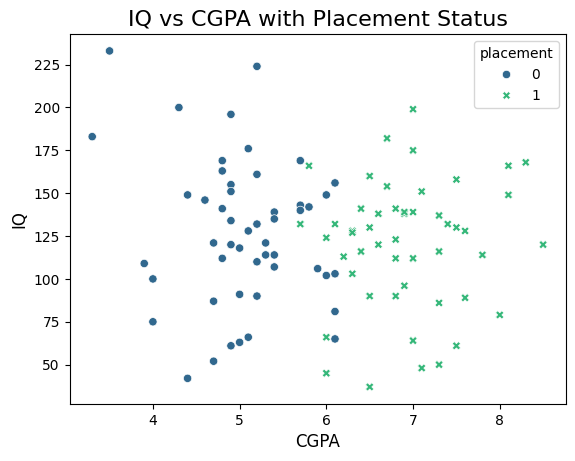

In [138]:
import seaborn as sns 
sns.scatterplot(x = df['cgpa'] , y = df['iq'] , hue = df['placement'], palette='viridis' , style=df['placement'])
plt.title("IQ vs CGPA with Placement Status", fontsize=16)
plt.xlabel("CGPA", fontsize=12)
plt.ylabel("IQ", fontsize=12)
plt.show()

In [139]:
x = df.iloc[: , 0:2]
y = df.iloc[: , -1  ]

In [140]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [141]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [142]:
from sklearn.model_selection import train_test_split 
x_train , x_test , y_train, y_test = train_test_split(x , y , test_size=0.1)

In [143]:
print(x_test)
print(y_test)

    cgpa     iq
69   8.5  120.0
53   8.3  168.0
3    7.4  132.0
44   7.5   61.0
52   7.0  175.0
66   6.9   96.0
62   6.0  102.0
54   6.4  141.0
98   6.3  103.0
45   6.0   66.0
69    1
53    1
3     1
44    1
52    1
66    1
62    0
54    1
98    1
45    1
Name: placement, dtype: int64


In [144]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()


In [145]:
x_train = scaler.fit_transform(x_train)
x_train

array([[ 0.74476974,  1.44047975],
       [ 0.47376188, -0.20943342],
       [-0.42959764, -0.43442158],
       [-0.8812774 ,  0.2405429 ],
       [ 0.38342593,  0.09055079],
       [-1.15228525,  0.54052711],
       [ 0.02208212, -0.45942027],
       [ 0.83510569, -0.03444263],
       [-1.0619493 , -0.93439527],
       [ 0.74476974,  0.74051659],
       [-0.51993359, -0.08444   ],
       [-0.79094144, -0.83440054],
       [-0.15858978,  0.19054553],
       [-0.42959764, -0.25943079],
       [ 0.56409783,  0.14054816],
       [-1.69430096, -0.60941238],
       [ 1.5577933 ,  0.09055079],
       [ 0.65443378, -0.10943869],
       [ 0.65443378,  0.34053764],
       [-0.8812774 ,  0.66552053],
       [ 0.83510569, -0.85939922],
       [-0.79094144, -0.15943605],
       [ 1.01577759, -0.30942816],
       [-0.61026954, -0.85939922],
       [-0.06825383,  0.44053237],
       [-1.0619493 , -0.08444   ],
       [ 1.10611354, -1.90934397],
       [-0.8812774 , -1.58436107],
       [ 1.01577759,

In [146]:
x_test = scaler.transform(x_test)
x_test

array([[ 2.37081687, -0.10943869],
       [ 2.19014496,  1.09049817],
       [ 1.3771214 ,  0.19054553],
       [ 1.46745735, -1.58436107],
       [ 1.01577759,  1.26548896],
       [ 0.92544164, -0.70940711],
       [ 0.11241807, -0.55941501],
       [ 0.47376188,  0.41553369],
       [ 0.38342593, -0.53441632],
       [ 0.11241807, -1.45936765]])

In [147]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [148]:
y_predict = lr.predict(x_test)
y_predict

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0])

In [149]:
y_test

69    1
53    1
3     1
44    1
52    1
66    1
62    0
54    1
98    1
45    1
Name: placement, dtype: int64

In [154]:
y_train


array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0])

<Axes: >

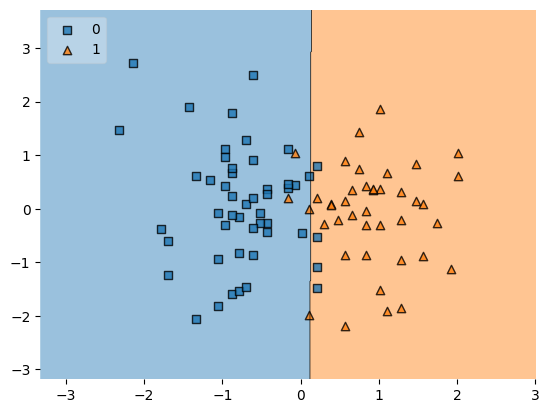

In [155]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train , y_train , clf = lr, legend = 2 )


In [68]:
import pickle

In [156]:
pickle.dump(lr , open('model.pkl','wb'))